In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import sklearn
import scanpy as sc
import os

In [2]:
spatialLIBD_dir = 'data/spatialLIBD_data'

In [3]:
# temp = pd.read_pickle(os.path.join(spatialLIBD_dir, 'temp.pkl'))

In [4]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
cffi                1.15.1
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           0.9.1
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.15.1
ipython_genutils    0.2.0
ipywidgets          7.7.1
jedi                0.18.1
joblib              1.1.0
jupyter_server      1.18.1
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.38.1
matplotlib          3.5.1
matplotlib_inline   NA
mpl_toolkits        NA
natsort             8.1.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.55.2
numexpr             2.8.3
numpy               1.22.4
packaging

In [5]:

# adata_spatial_anterior = sc.datasets.visium_sge(
#     sample_id="V1_Mouse_Brain_Sagittal_Anterior"
# )
# adata_spatial_posterior = sc.datasets.visium_sge(
#     sample_id="V1_Mouse_Brain_Sagittal_Posterior"
# )

# adata_spatialLIBD = sc.AnnData(temp, dtype=np.float32)
# adata_spatialLIBD

In [6]:
# adata_spatialLIBD.obs_names

In [7]:
# adata_spatialLIBD.var_names

In [8]:
# adata_spatialLIBD.X

In [9]:
# adata_spatialLIBD.obs

In [10]:
# adata_spatialLIBD.var

In [11]:
# sc.pp.normalize_total(adata_spatialLIBD, inplace=True)

In [12]:
# adata.obs

In [13]:
# adata_spatialLIBD

In [14]:
# dlpfc = pd.read_pickle('data/spatialLIBD_data/dlpfc.pkl')

In [15]:
# adata_spatialLIBD.obs = pd.concat([adata_spatialLIBD.obs, dlpfc[['in_tissue', 'X', 'Y']]], axis=1, join='inner')

In [16]:
# adata_spatialLIBD.obs

In [17]:
# adata_spatialLIBD.var

In [18]:
# from scipy.sparse import csr_matrix
# adata_spatialLIBD.X = csr_matrix(adata_spatialLIBD.X)

In [19]:
# adata_spatialLIBD.write(os.path.join(spatialLIBD_dir, 'adata_spatialLIBD.h5ad'))

In [20]:
adata_spatialLIBD = sc.read_h5ad(os.path.join(spatialLIBD_dir, 'adata_spatialLIBD.h5ad'))

# Single cell Data: GSE115746


In [21]:
# adata_sc_dlpfc = sc.read_mtx('data/sc_dlpfc/GSE144136_GeneBarcodeMatrix_Annotated.mtx').T

In [25]:
# adata_sc_dlpfc_var_names = pd.read_csv('data/sc_dlpfc/GSE144136_GeneNames.csv', index_col=0).x
# adata_sc_dlpfc_obs_names = pd.read_csv('data/sc_dlpfc/GSE144136_CellNames.csv', index_col=0).x

In [22]:
# adata_sc_dlpfc.var_names.astype(int).is_monotonic_increasing #.map(adata_sc_dlpfc_var_names.to_dict())

In [23]:
# adata_sc_dlpfc.obs_names.astype(int).is_monotonic_increasing

In [24]:
# adata_sc_dlpfc_var_names.index.is_monotonic_increasing


In [25]:
# adata_sc_dlpfc_obs_names.index.is_monotonic_increasing


In [26]:
# adata_sc_dlpfc.var_names = adata_sc_dlpfc_var_names

In [27]:
# adata_sc_dlpfc.obs_names = adata_sc_dlpfc_obs_names

In [28]:
# adata_sc_dlpfc = adata_sc_dlpfc[adata_sc_dlpfc.obs.index.str.contains('Control')]

In [29]:
# adata_sc_dlpfc.obs['cell_subclass'] = adata_sc_dlpfc.obs.index.str.split('.', expand=True).get_level_values(0)

In [30]:
# adata_sc_dlpfc.obs['cell_subclass'].unique()

In [31]:
# adata_sc_dlpfc.X = csr_matrix(adata_sc_dlpfc.X)

In [41]:
# sc.pp.normalize_total(adata_sc_dlpfc, inplace=True)
# adata_sc_dlpfc.var_names_make_unique()
# adata_sc_dlpfc.write('data/sc_dlpfc/adata_sc_dlpfc.h5ad')

In [42]:
adata_sc_dlpfc = sc.read_h5ad('data/sc_dlpfc/adata_sc_dlpfc.h5ad')
adata_sc_dlpfc.var_names_make_unique()

In [43]:
adata_sc_dlpfc

AnnData object with n_obs × n_vars = 35212 × 30062
    obs: 'cell_subclass'
    uns: 'rank_genes_groups'

In [44]:
sc.tl.rank_genes_groups(adata_sc_dlpfc, 'cell_subclass', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:13)


/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWa

In [61]:
genelists=adata_sc_dlpfc.uns['rank_genes_groups']['names']
df_genelists = pd.DataFrame.from_records(genelists)
df_genelists.head(5)

num_markers=10
res_genes = []
for column in df_genelists.head(num_markers): 
    res_genes.extend(df_genelists.head(num_markers)[column].tolist())
res_genes_ = list(set(res_genes))

adata_spatialLIBD.var_names_make_unique() 
inter_genes = [val for val in res_genes_ if val in adata_spatialLIBD.var.index]
print('Selected Feature Gene number',len(inter_genes))
adata_sc_dlpfc = adata_sc_dlpfc[:,inter_genes]

adata_spatialLIBD = adata_spatialLIBD[:,inter_genes]

Selected Feature Gene number 202


In [62]:
from sklearn.preprocessing import OneHotEncoder

def random_mix(Xs, ys, nmix=5, n_samples=10000, seed=0):
    # Define empty lists
    Xs_new, ys_new =[], []
    ys_ = OneHotEncoder().fit_transform(ys.reshape(-1, 1)).toarray()

    rstate = np.random.RandomState(seed)
    fraction_all = rstate.rand(n_samples, nmix)
    randindex_all = rstate.randint(len(Xs), size=(n_samples,nmix))

    for i in range(n_samples):
        # fraction: random fraction across the "nmix" number of sampled cells
        fraction = fraction_all[i]
        fraction = fraction/np.sum(fraction)
        fraction = np.reshape(fraction, (nmix,1))
        
        # Random selection of the single cell data by the index
        randindex = randindex_all[i]
        ymix = ys_[randindex]
        # Calculate the fraction of cell types in the cell mixture
        yy = np.sum(ymix*fraction, axis=0)
        # Calculate weighted gene expression of the cell mixture
        XX = np.asarray(Xs[randindex])*fraction
        XX_ = np.sum(XX, axis=0)
        
        # Add cell type fraction & composite gene expression in the list
        ys_new.append(yy)
        Xs_new.append(XX_)

    Xs_new = np.asarray(Xs_new)
    ys_new = np.asarray(ys_new)

    return Xs_new, ys_new

In [63]:
mat_sc = adata_sc_dlpfc.X.todense()
mat_sp = adata_spatialLIBD.X.todense()

df_sc = adata_sc_dlpfc.obs

lab_sc_sub = df_sc.cell_subclass
sc_sub_dict = dict(zip(range(len(set(lab_sc_sub))), set(lab_sc_sub)))
sc_sub_dict2 = dict((y,x) for x,y in sc_sub_dict.items())
lab_sc_num = [sc_sub_dict2[ii] for ii in lab_sc_sub]
lab_sc_num = np.asarray(lab_sc_num, dtype='int')

sc_mix, lab_mix = random_mix(mat_sc, lab_sc_num, nmix=8, n_samples=len(mat_sp))

def log_minmaxscale(arr):
    arrd = len(arr)
    arr = np.log1p(arr)
    return (arr-np.reshape(np.min(arr,axis=1), (arrd,1)))/np.reshape((np.max(arr, axis=1)-np.min(arr,axis=1)),(arrd,1))

sc_mix_s = log_minmaxscale(sc_mix)
mat_sp_s = log_minmaxscale(mat_sp)
mat_sc_s = log_minmaxscale(mat_sc)


In [64]:
OneHotEncoder().fit_transform(lab_sc_num.reshape(-1, 1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
mat_sc.shape

(35212, 202)

In [66]:
pd.DataFrame(sc_mix_s).std().mean()

0.12428017231398224

In [67]:
pd.DataFrame(mat_sp_s).std().mean()

0.10379795730113983

In [68]:
pd.DataFrame(sc_mix_s).mean().mean()

0.23293750697281798

In [69]:
pd.DataFrame(mat_sp_s).mean().mean()

0.2676231861114502

In [70]:
all_df = pd.concat([pd.DataFrame(sc_mix_s), pd.DataFrame(mat_sp_s)], keys = [0, 1])

In [71]:
all_df

0         1         2         3         4         5         6    \
0 0     0.846617  0.090578  0.092776  0.029461  0.604079  0.201118  0.199139   
  1     0.729936  0.348512  0.272335  0.117931  0.526249  0.171414  0.063840   
  2     0.789494  0.072337  0.257349  0.034841  0.341215  0.373153  0.080986   
  3     0.572286  0.228870  0.000000  0.000000  0.771934  0.074501  0.058461   
  4     0.610000  0.347673  0.167743  0.000000  0.662649  0.415005  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
1 3634  0.222498  0.244592  0.271852  0.271852  0.723115  0.271852  0.271852   
  3635  0.238411  0.283840  0.238411  0.000000  0.741423  0.238411  0.238411   
  3636  0.447423  0.353904  0.332170  0.412660  0.902958  0.000000  0.284687   
  3637  0.000000  0.310207  0.310207  0.000000  0.524846  0.000000  0.310207   
  3638  0.261546  0.430313  0.261546  0.416380  0.938644  0.261546  0.361623   

             7         8         9    ...       192       193       194  \
0 0     0.241779  0.000000  0.072849  ...  0.543999  0.327833  0.148926   
  1     0.264823  0.051499  0.001557  ...  0.447074  0.442683  0.139912   
  2     0.195857  0.000000  0.262985  ...  0.512180  0.082764  0.062026   
  3     0.042423  0.000000  0.058300  ...  0.094543  0.229629  0.225122   
  4     0.017491  0.400920  0.000000  ...  0.119401  0.237748  0.452235   
...          ...       ...       ...  ...       ...       ...       ...   
1 3634  0.222498  0.423575  0.222498  ...  0.222498  0.444197  0.469767   
  3635  0.238411  0.460892  0.238411  ...  0.238411  0.406774  0.439954   
  3636  0.284687  0.358109  0.000000  ...  0.000000  0.475916  0.550691   
  3637  0.310207  0.310207  0.000000  ...  0.000000  0.524846  0.426464   
  3638  0.261546  0.475479  0.306418  ...  0.261546  0.612590  0.416380   

             195       196       197       198       199       200       201  
0 0     0.112531  0.372751  0.024678  0.209351  0.218343  0.000000  0.438690  
  1     0.085654  0.942456  0.050147  0.121880  0.016231  0.001557  0.025958  
  2     0.025770  0.678978  0.000000  0.131081  0.237153  0.000000  0.281478  
  3     0.060655  0.776356  0.000000  0.266463  0.157708  0.058461  0.388744  
  4     0.469508  0.381632  0.000000  0.185829  0.282501  0.000000  0.219342  
...          ...       ...       ...       ...       ...       ...       ...  
1 3634  0.421633  0.000000  0.222498  0.222498  0.302944  0.000000  0.222498  
  3635  0.376021  0.238411  0.238411  0.000000  0.238411  0.000000  0.000000  
  3636  0.551823  0.284687  0.332170  0.000000  0.394042  0.284687  0.000000  
  3637  0.367669  0.000000  0.000000  0.310207  0.456763  0.000000  0.000000  
  3638  0.576762  0.261546  0.261546  0.261546  0.449726  0.261546  0.000000  

[7278 rows x 202 columns]

In [72]:
all_z_df = all_df.copy()

In [73]:
from sklearn.preprocessing import StandardScaler

all_z_df.loc[0] = StandardScaler().fit_transform(all_z_df.loc[0])
all_z_df.loc[1] = StandardScaler().fit_transform(all_z_df.loc[1])

In [74]:
all_z_df

0         1         2         3         4         5         6    \
0 0     1.016523 -0.247213 -0.677974 -0.346959  0.151630 -0.366358  0.624575   
  1     0.087297  1.229779  0.744131  0.829858 -0.319266 -0.592716 -0.557344   
  2     0.561609 -0.351667  0.625441 -0.275395 -1.438790  0.944642 -0.407565   
  3    -1.168188  0.544680 -1.412759 -0.738839  1.167213 -1.331247 -0.604335   
  4    -0.867846  1.224976 -0.084234 -0.738839  0.506003  1.263580 -1.115024   
...          ...       ...       ...       ...       ...       ...       ...   
1 3634 -0.542467 -1.751491 -0.255342  0.094173 -1.068337 -0.036503 -0.304878   
  3635 -0.372019 -1.220063 -0.648213 -2.213218 -0.903895 -0.384524 -0.653464   
  3636  1.866807 -0.271379  0.453263  1.289301  0.547022 -2.865600 -0.171094   
  3637 -2.925748 -0.863050  0.195242 -2.213218 -2.849203 -2.865600  0.094913   
  3638 -0.124201  0.763209 -0.376416  1.320874  0.867558 -0.143756  0.630854   

             7         8         9    ...       192       193       194  \
0 0     0.539343 -0.553160  0.802332  ...  0.711588  0.292501 -0.306042   
  1     0.760780 -0.101372 -0.471614  ... -0.061969  1.051771 -0.375397   
  2     0.098046 -0.553160  4.199949  ...  0.457645 -1.327646 -0.974715   
  3    -1.376396 -0.553160  0.542346  ... -2.875511 -0.356726  0.280268   
  4    -1.615981  2.964034 -0.499433  ... -2.677119 -0.303052  2.027857   
...          ...       ...       ...  ...       ...       ...       ...   
1 3634 -0.023081  1.016018 -0.270344  ...  0.562543 -1.065574 -0.356444   
  3635  0.107990  1.316722 -0.128830  ...  0.679493 -1.516503 -0.720747   
  3636  0.489166  0.488484 -2.249044  ... -1.072705 -0.683360  0.632413   
  3637  0.699369  0.102482 -2.249044  ... -1.072705 -0.093779 -0.885594   
  3638  0.298557  1.434263  0.475968  ...  0.849530  0.963511 -1.008815   

             195       196       197       198       199       200       201  
0 0    -0.222838 -0.630845 -0.385737 -0.212043  0.205611 -0.552615  1.927644  
  1    -0.427968  1.607714 -0.183219 -0.825208 -1.280529 -0.532766 -1.492129  
  2    -0.885011  0.572421 -0.581973 -0.760713  0.343921 -0.552615  0.625037  
  3    -0.618760  0.955050 -0.581973  0.188310 -0.240240  0.192751  1.513809  
  4     2.501633 -0.595950 -0.581973 -0.376928  0.677370 -0.552615  0.110195  
...          ...       ...       ...       ...       ...       ...       ...  
1 3634 -1.334398 -1.327339 -0.376455  0.679708 -1.563462 -1.427250  1.491069  
  3635 -1.811604  0.424773 -0.217968 -0.969456 -2.370416 -1.427250 -0.551385  
  3636  0.027684  0.764866  0.715853 -0.969456 -0.424341  0.518445 -0.551385  
  3637 -1.898981 -1.327339 -2.592482  1.329810  0.359936 -1.427250 -0.551385  
  3638  0.288601  0.594801  0.012459  0.969137  0.271942  0.360289 -0.551385  

[7278 rows x 202 columns]

In [75]:
all_df.index.get_level_values(0).to_numpy()

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
import umap
from sklearn.decomposition import PCA


from sklearn.manifold import TSNE


def get_PCA_2D(X):
    pca = PCA(n_components=2)
    pca.fit(X)
    return pca.transform(X)

def plot_scatter(X, labels, legend=None, title=""):
    markers=['o','o','o','^']
    n_clusters = labels.max() + 1
    
    if legend is None:
        legend = [str(i) for i in range(n_clusters)]
    
    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        print(i, len(points))
        plt.scatter(points[:, 0], points[:, 1], label=legend[i], marker=markers[i%len(markers)])
    
    if labels.min()==-1:
        points = np.array([X[j] for j in range(len(X)) if labels[j] == -1])
        plt.scatter(points[:, 0], points[:, 1], c='black', label='-1')
     
    plt.title(title)
    plt.legend()
    # plt.show()
    
def plot_scatter_subfig(X, labels, ax, legend=None, title=""):
    markers=['.','.','o','^']
    n_clusters = labels.max() + 1
    if legend is None:
        legend = [str(i) for i in range(n_clusters)]
        
    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], label=legend[i], marker=markers[i%len(markers)])
    ax.legend(legend)
    if labels.min()==-1:
        points = np.array([X[j] for j in range(len(X)) if labels[j] == -1])
        ax.scatter(points[:, 0], points[:, 1], c='black', label='-1')
        
    ax.set_title(title)

In [77]:
# data_pca = get_PCA_2D(all_df)
# data_umap = umap.UMAP().fit_transform(all_df)
# data_tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=374).fit_transform(all_df)

data_pca_z = get_PCA_2D(all_z_df)
data_umap_z = umap.UMAP().fit_transform(all_z_df)
data_tsne_z = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=374).fit_transform(all_z_df)

/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


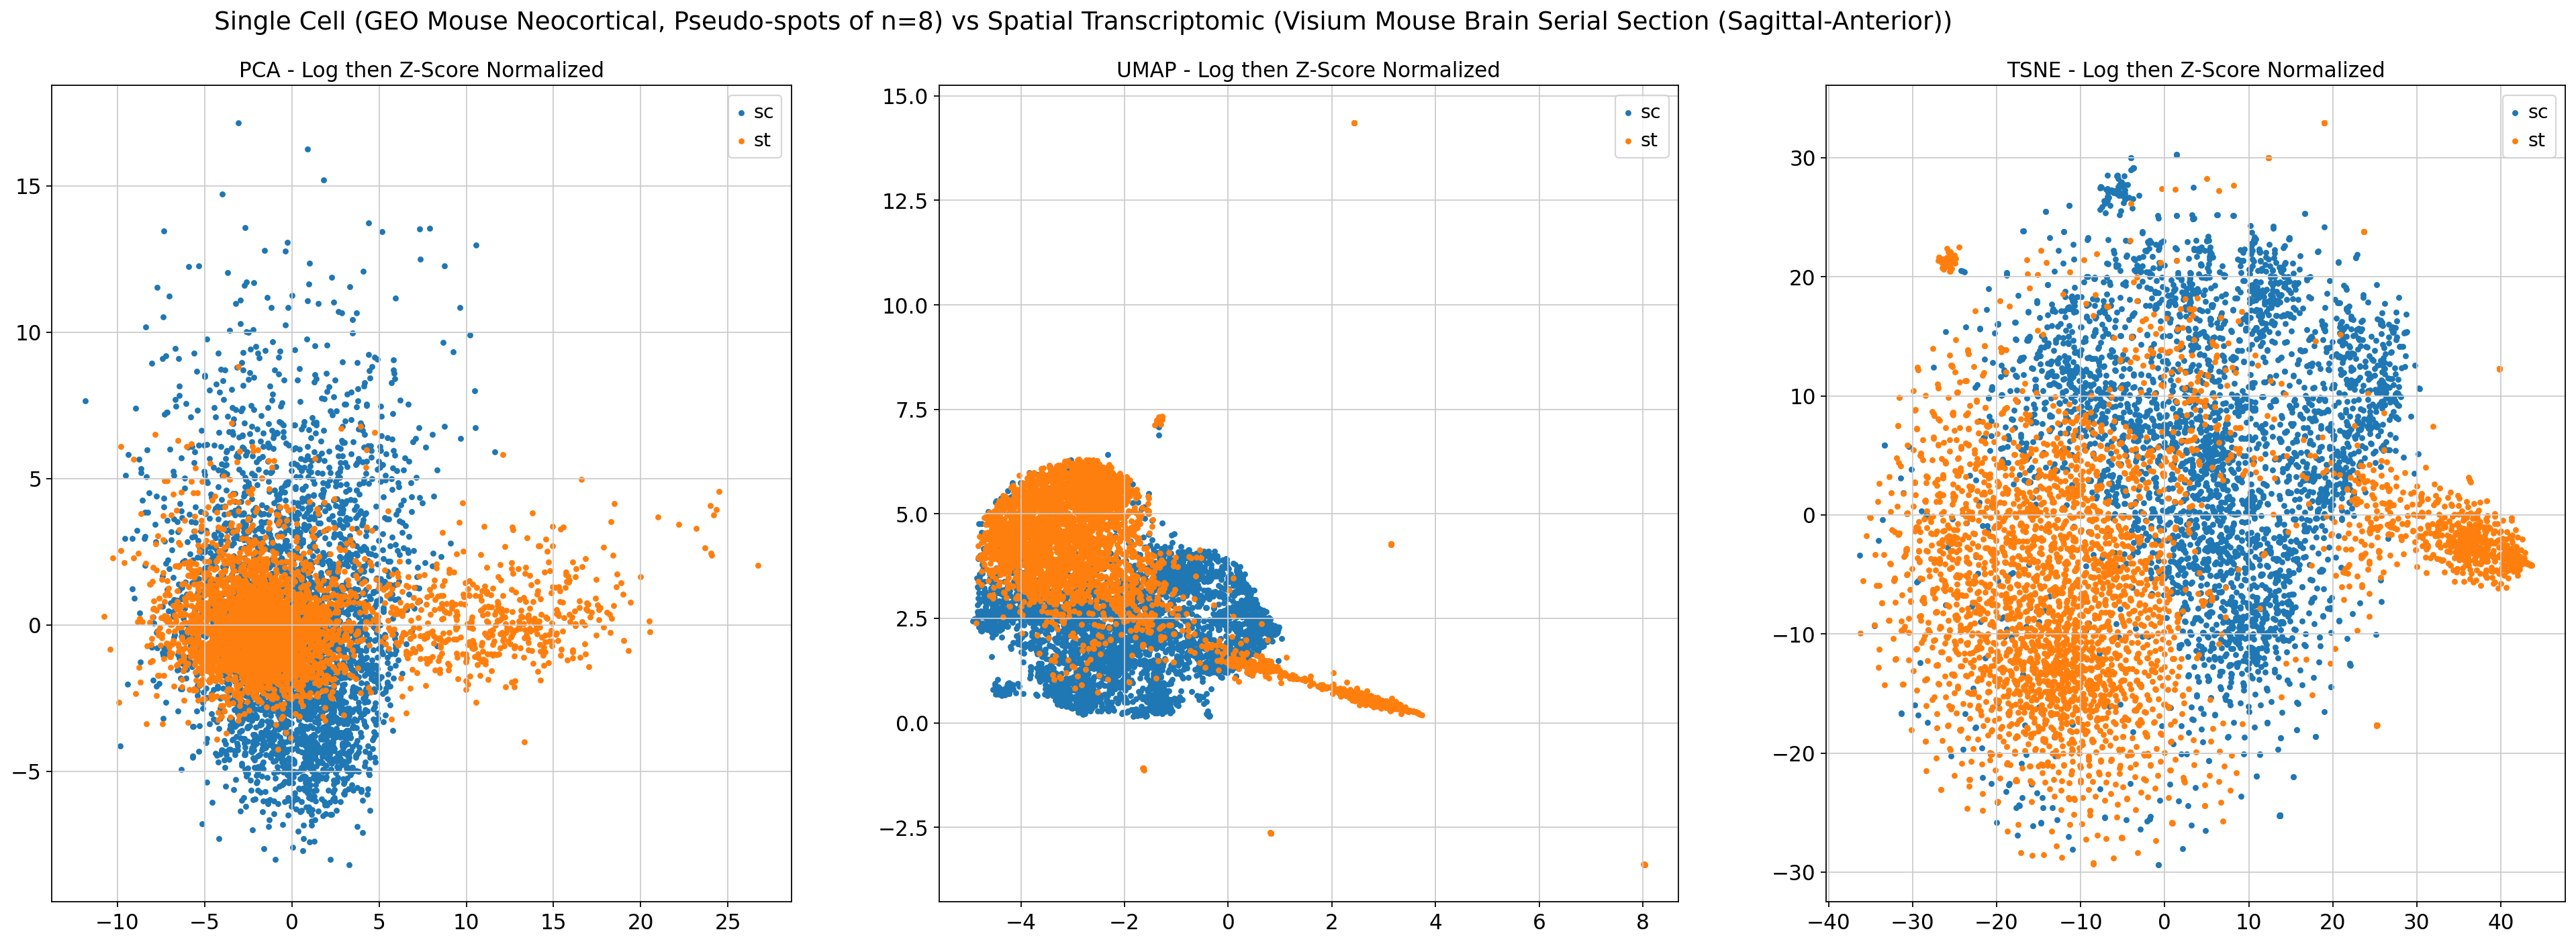

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))
# plot_scatter_subfig(data_pca, all_df.index.get_level_values(0).to_numpy(), axs[0][0], title=f'PCA - Min-Max Normalized', legend=['sc', 'st'])
# plot_scatter_subfig(data_umap, all_df.index.get_level_values(0).to_numpy(), axs[0][1], title=f'UMAP - Min-Max Normalized', legend=['sc', 'st'])

plot_scatter_subfig(data_pca_z, all_z_df.index.get_level_values(0).to_numpy(), axs[0], title=f'PCA - Log then Z-Score Normalized', legend=['sc', 'st'])
plot_scatter_subfig(data_umap_z, all_z_df.index.get_level_values(0).to_numpy(), axs[1], title=f'UMAP - Log then Z-Score Normalized', legend=['sc', 'st'])
plot_scatter_subfig(data_tsne_z, all_z_df.index.get_level_values(0).to_numpy(), axs[2], title=f'TSNE - Log then Z-Score Normalized', legend=['sc', 'st'])


    
    
fig.suptitle(f'Single Cell (GEO Mouse Neocortical, Pseudo-spots of n=8) vs Spatial Transcriptomic (Visium Mouse Brain Serial Section (Sagittal-Anterior))')

plt.show(block=False)

In [79]:
Z = sch.linkage(all_z_df, method='ward', metric = 'euclidean')

/tmp/ipykernel_8067/856991027.py:72: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(neg, cax=cbaxes, orientation='horizontal',


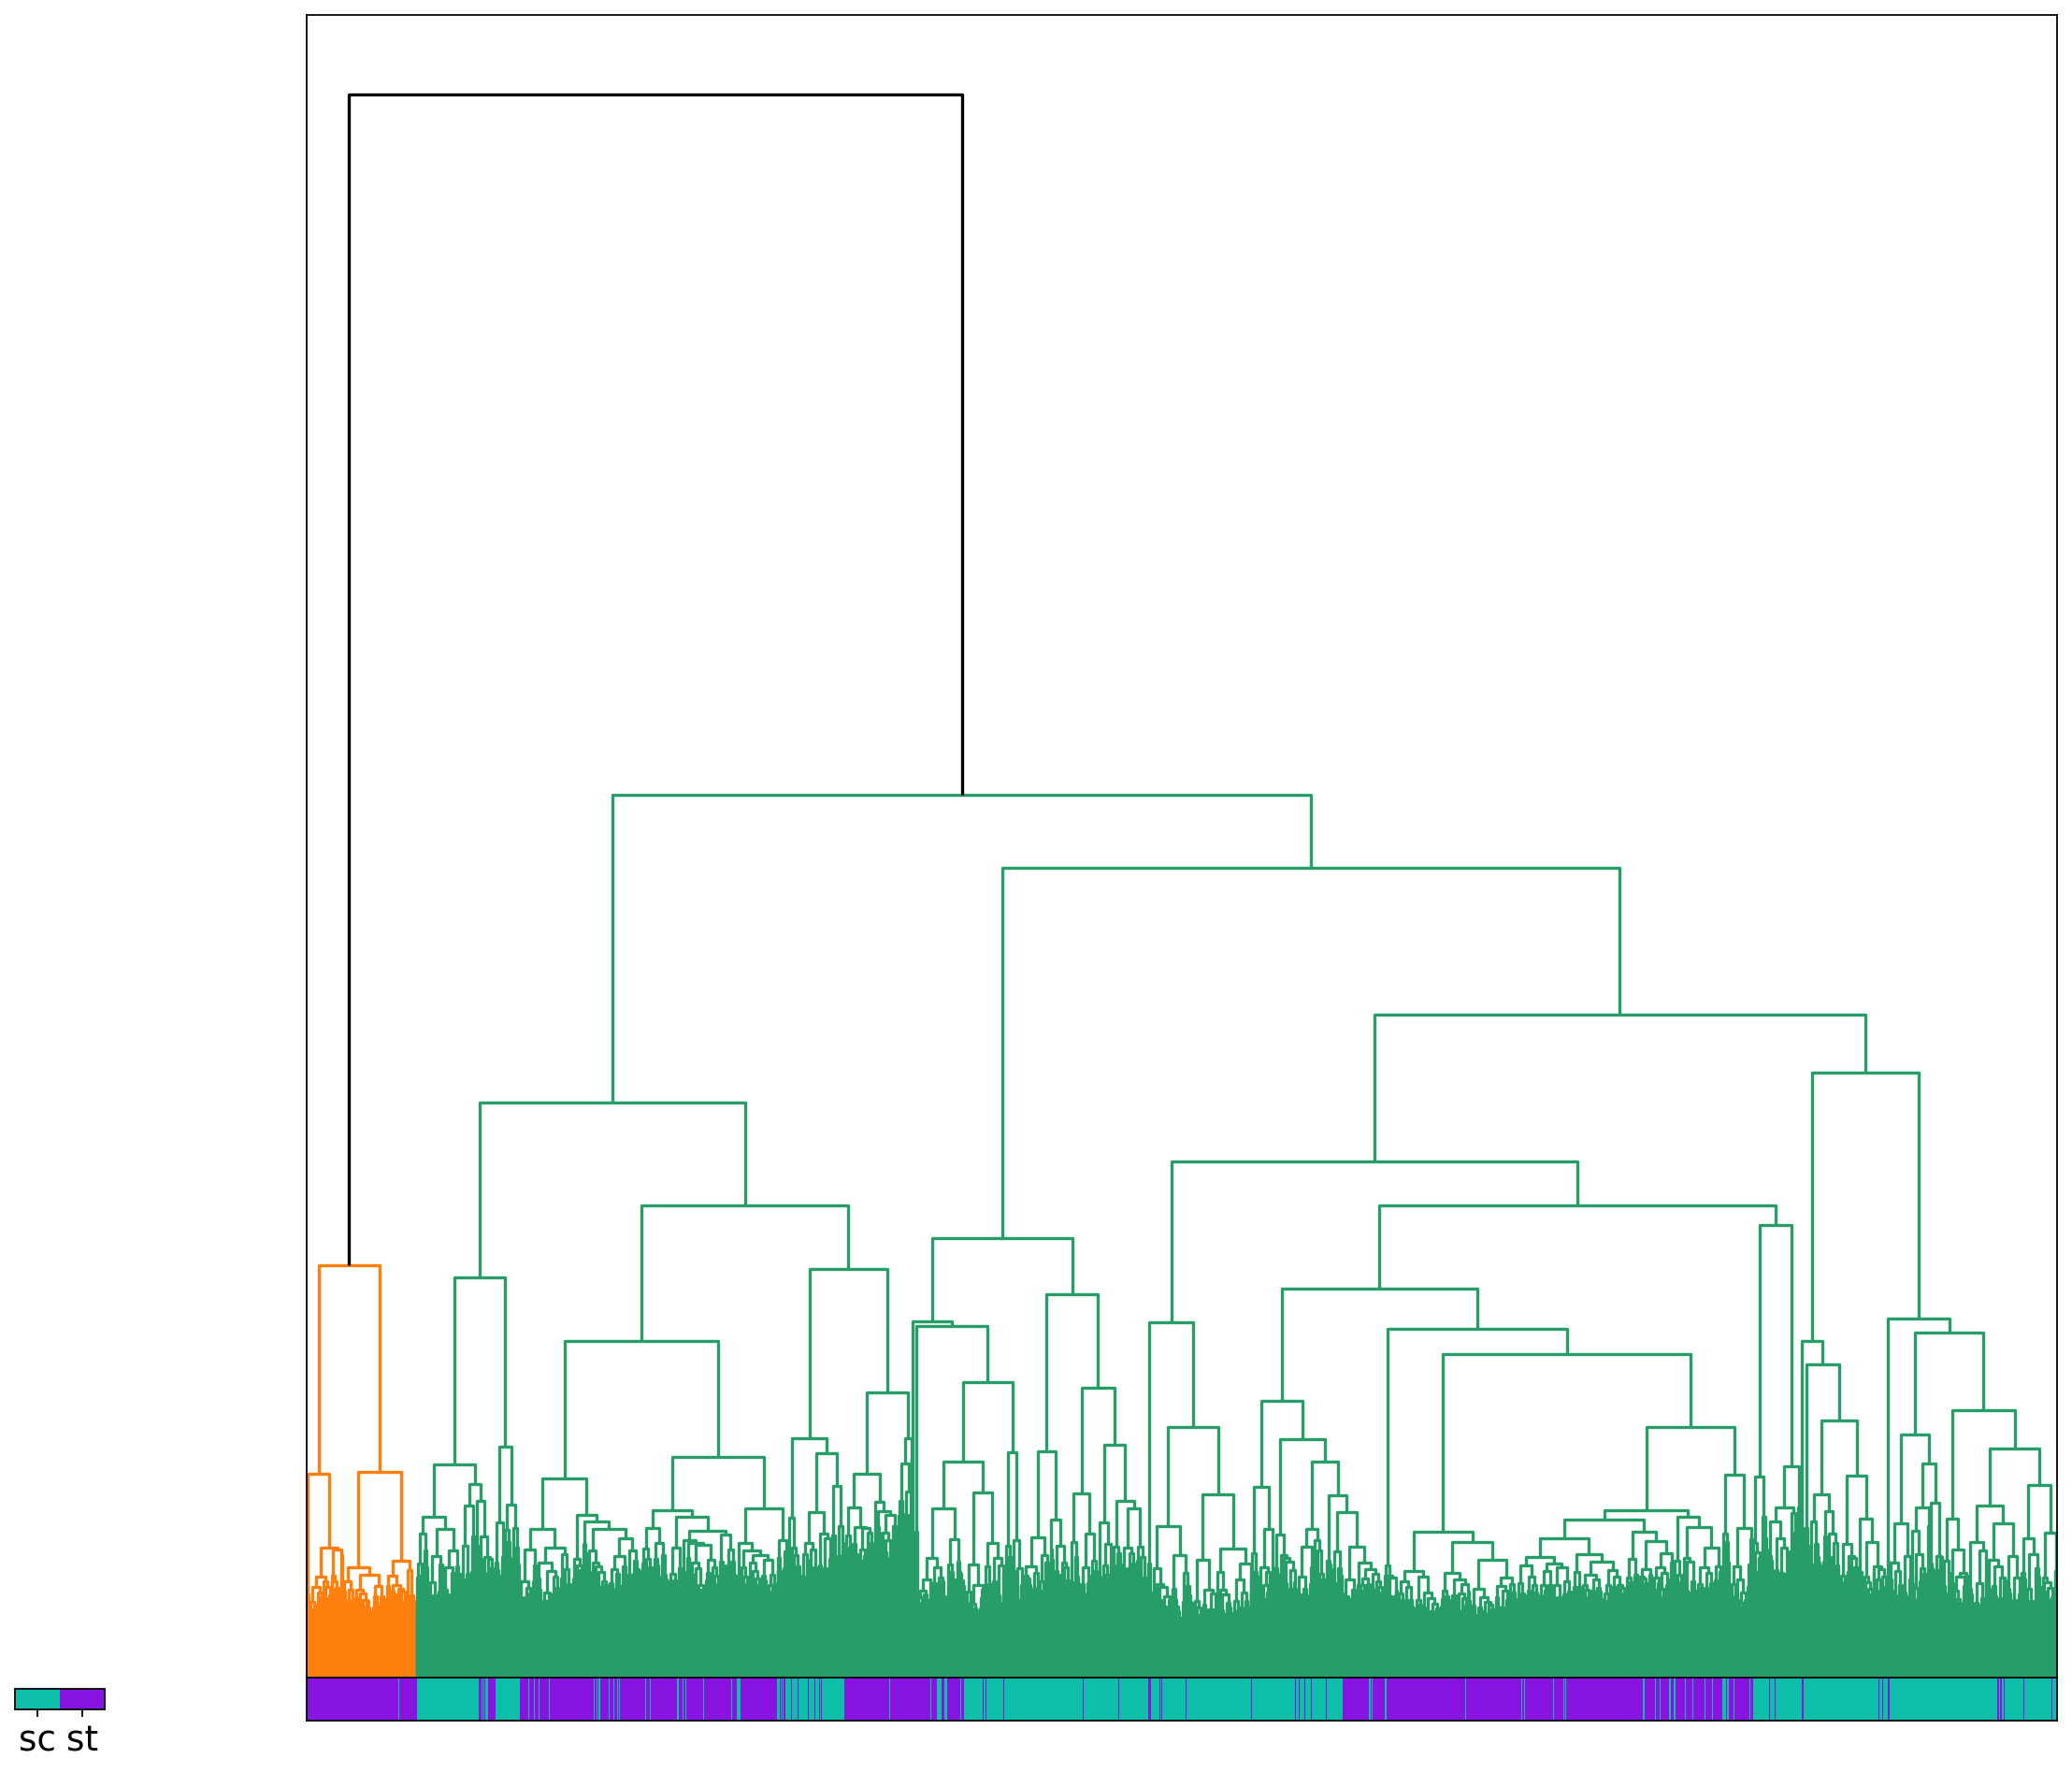

In [80]:
# # import matplotlib.cm
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)),
        N=n
    )
    return new_cmap

from matplotlib.colors import rgb2hex
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2,
                       1,
                       height_ratios=[39, 1],
                       hspace=0.00)

ax2 = fig.add_subplot(gs[0])#add_axes([0,0.75,1,0.45])




clust_labels = all_z_df.index.get_level_values(0).to_numpy()

Z2 = sch.dendrogram(Z, color_threshold = Z[len(Z) - 2+1,2],  above_threshold_color='k')

ax2.set_xticks([])
ax2.set_yticks([])

# label clusters
clust_labels_dendo = clust_labels[Z2['leaves']]

idx2 = Z2['leaves']





axb = fig.add_subplot(gs[1])


cat_vals = clust_labels[idx2]

n=(~np.isnan(np.unique(cat_vals))).sum()

cmap = plt.cm.get_cmap('bwr', n)
cmap = mcolors.ListedColormap(['#0dbea8', '#8714e1'])

cmap.set_bad('white',1.)

neg = axb.matshow(np.atleast_2d(cat_vals),
                       aspect='auto',
                       origin='lower',
                            cmap=cmap)

pos1 = axb.get_position() # get the original position 
cbaxes = fig.add_axes([0.05, pos1.y0 + pos1.height / 4.0,  0.08*(~np.isnan(np.unique(cat_vals))).sum()/4, pos1.height / 2.0])
ticks = np.unique(cat_vals[~np.isnan(cat_vals)])
cbar = fig.colorbar(neg, cax=cbaxes, orientation='horizontal',
                    ticks=[tick-(tick-ticks.mean())/len(ticks) for tick in ticks])
#                             ticks=ticks
#         tick_locs = (np.arange(n) + 0.5)*(n-1)/n
#         cbar.ax.set_ticks(tick_locs)

cbar.ax.set_xticklabels(['sc', 'st'],rotation=0,fontsize='large')


axb.set_yticks([])
axb.set_xticks([])
    # axb.text(-0.01,
    #      0.5,
    #      cat_bar_var,
    #      horizontalalignment='right',
    #      verticalalignment='center',
    #      transform=bar_axs_cat[i].transAxes,
    #                     fontsize='large'
    #     )
#     bar_axs_cat[i].legend(np.unique(labels[cat_bar_var][[(legend[cat_bar_var][label_name] != 'Indeterminate') for label_name in labels[cat_bar_var]]]).tolist(),
#                           [x for x in legend[cat_bar_var] if x != 'Indeterminate'])
    


#     for vert_po in vert_pos:
#         bar_axs_cat[i].axvline(vert_po, color='k', alpha=1)

# pos_hm = axmatrix.get_position()
# cbaxes = fig.add_axes([0.05, pos_hm.y0+ pos1.height*2, 0.13, pos1.height])  #[left, bottom, width, height]
# cbar = plt.colorbar(im,
#                     cax=cbaxes,
#                     orientation='horizontal',
#                     ticks=[1/(1+np.exp(steeepness*2)),
#                            1/(1+np.exp(steeepness*1)),
#                            1/(1+np.exp(steeepness*0)),
#                            1/(1+np.exp(-steeepness*1)),
#                            1/(1+np.exp(-steeepness*2))])
# cbar.ax.set_xticklabels(['-2', '-1', '0', '1', '2'], fontsize='xx-large')  # vertically oriented colorbar
# cbar.ax.xaxis.tick_left()

# fig.suptitle("\n".join(wrap(f'Dendogram and Heatmap - {params_clust["num_clusters"]} Clusters - subset={subset_str}', 100)),y=0.9)

# plt.savefig(os.path.join(results_dir_out, f'Dendo_heat-{params_clust["num_clusters"]}_clusters.png'), dpi=300)
plt.show(block=False)


In [81]:
agglo_clust = sch.cut_tree(Z, n_clusters=2).T[0]

In [82]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf =  RandomForestClassifier(random_state=23, n_jobs=-1)
# clf = SVC(gamma=2, C=1)
# clf = LogisticRegression()



X_train, X_test, y_train, y_test = train_test_split(
    all_z_df, all_z_df.index.get_level_values(0).to_numpy(), test_size=0.2, random_state=256
)

clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(1.0, 1.0)

In [83]:
y_test.mean(), y_train.mean()

(0.5157967032967034, 0.4960494675369289)

In [84]:
clf = SVC(random_state=20)
# clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.978021978021978, 0.9994847131569907)

In [85]:
# clf = SVC(gamma=2, C=1)
clf = LogisticRegression(random_state=27)
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.38186813186813184, 0.5319477842665751)